In [1]:
# Dependencies
import numpy as np
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

#Plot Dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_temps = []
june_temps = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 6).all()

In [5]:
#  3. Convert the June temperatures to a list.
june_temps_list = []
june_temps_list = session.query(Measurement.tobs).filter(extract('month', Measurement.date) == 6).all()

In [6]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_temps_list_df = pd.DataFrame(june_temps_list)

In [7]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temps_list_df.describe()

,0
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [8]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_temps = []
dec_temps = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 12).all()

In [9]:
# 7. Convert the December temperatures to a list.
dec_temps_list = []
dec_temps_list = session.query(Measurement.tobs).filter(extract('month', Measurement.date) == 12).all()

In [10]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temps_list_df = pd.DataFrame(dec_temps_list)

In [11]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_temps_list_df.describe()

,0
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


Temperature Visualization

NameError: name 'fig' is not defined

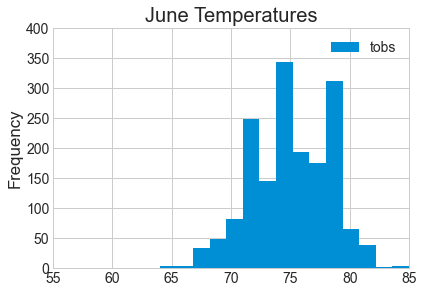

In [30]:
# June Temperatures
june_temps_list_df = pd.DataFrame(june_temps_list, columns=['tobs'])
june_temps_list_df.plot.hist(bins=15)
plt.tight_layout()
plt.title('June Temperatures')
plt.xlim([55, 85])
plt.ylim([0,400])
 
fig.savefig(june_temp.png)

(0.0, 400.0)

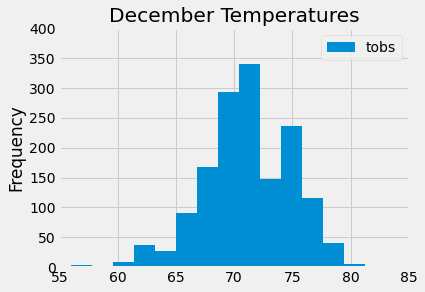

In [14]:
# December Temperatures
dec_temps_list_df = pd.DataFrame(dec_temps_list, columns=['tobs'])
dec_temps_list_df.plot.hist(bins=15)
plt.tight_layout()
plt.title('December Temperatures')
plt.xlim([55, 85])
plt.ylim([0,400])

In [27]:
# June Precipitation Query
june_precip_list = []
june_precip_list = session.query(Measurement.prcp).filter(extract('month', Measurement.date) == 6).all()
june_precip_list_df = pd.DataFrame(june_precip_list)
june_precip_list_df.describe()

,0
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


(0.0, 1400.0)

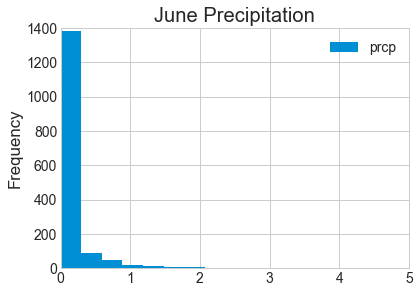

In [29]:
# June Precipitation
june_precip_list_df = pd.DataFrame(june_precip_list, columns=['prcp'])
june_precip_list_df.plot.hist(bins=15)
plt.tight_layout()
plt.title('June Precipitation')
plt.xlim([0, 5])
plt.ylim([0,1400])

In [15]:
# December Precipitation Query
dec_precip_list = []
dec_precip_list = session.query(Measurement.prcp).filter(extract('month', Measurement.date) == 12).all()
dec_precip_list_df = pd.DataFrame(dec_precip_list)
dec_precip_list_df.describe()

,0
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


(0.0, 1400.0)

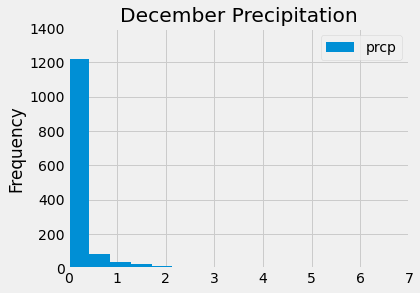

In [21]:
# December Precipitation
dec_precip_list_df = pd.DataFrame(dec_precip_list, columns=['prcp'])
dec_precip_list_df.plot.hist(bins=15)
plt.tight_layout()
plt.title('December Precipitation')
plt.xlim([0, 7])
plt.ylim([0,1400])